# Supervised Machine Learning - Image Processing

In this project, the 'MNIST' dataset of handwritten digits is explored, and supervised machine learning is leveraged by developing a random forest model. This model aims to perform operations on the image data to enhance clarity and improve image quality.


In [11]:
#improt libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


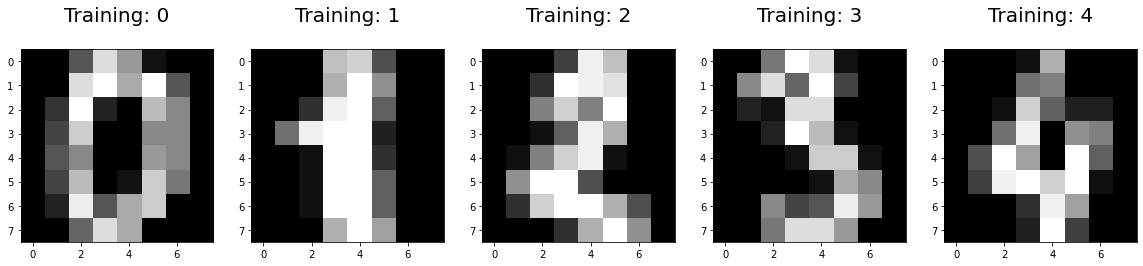

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

#### Split the data into a training and test set

This is done so the focus is on the training set to fine-tune our model, making sure it works well in real-life situations. After that, we check how well the model performs using the test set, which it hasn't seen before.

In [4]:
# select data
X = digits.data
y = digits.target

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Build Random Forest classification model - select tuning parameter

#### Tuning Parameter Selection

I've decided to focus on fine-tuning the max_depth parameter, given its substantial impact on the model's accuracy. Generally, accuracy tends to rise with increasing max_depth until reaching a peak value, after which it begins to declines or doesn't change. By optimizing this parameter, we can identify the ideal max_depth values for achieving the highest level of accuracy in our model. 

The accuracy score can be calculated by evaluating the model's performance on the test set compared to the one obtained from training on the training set.

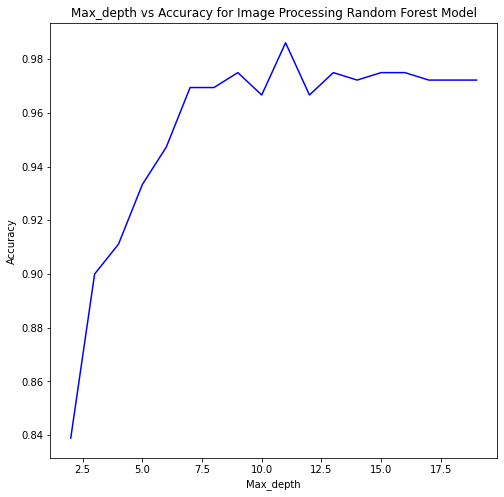

As seen in the plot above, the optimum max_depth value is 11, which allows the model to achieve the highest accuracy of 0.99. A max_depth value of 11 should be used for testing on the test set


In [6]:
# range of max_depth valuess to check the accuracy of the model
depths = range(2,20,1)

# empty list to stroe accuracies
acc = []

for d in depths:
    forest = RandomForestClassifier(n_estimators=100, random_state=4, max_depth = d)
    forest.fit(X_train,y_train)
    score = forest.score(X_test, y_test)
    acc.append(score)

# line plot to show how accuracy score changes with max_depth value
plt.figure(figsize = (8,8))
plt.plot(depths,acc, 'b')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Max_depth vs Accuracy for Image Processing Random Forest Model')
plt.show()


# get optimum max_depth

# optimum accuracy score
opt_acc = max(acc) 

# index of optimum accuracy score
opt_acc_ind = acc.index(opt_acc)

# get optimum max_depth using index of optimum accuracy score
opt_d = depths[opt_acc_ind]

print(f"As seen in the plot above, the optimum max_depth value is {opt_d}, which allows the model to achieve the highest accuracy of {round(opt_acc,2)}. A max_depth value of {opt_d} should be used for testing on the test set")

### Print confusion matrix

In [10]:
# create random forest model with optimum max_depth and fit the training data
forest = RandomForestClassifier(n_estimators=100, random_state=4, max_depth = 11)
forest.fit(X_train, y_train)


# predictions on test data
y_pred = forest.predict(X_test).reshape(-1,1)

# print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n\n{cm}")

Confusion matrix:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


The classes that the model struggle with most are '1', '3','4', '5' and '7'.

### Accuracy, precision, recall, and f1-score

In [16]:
# accuracy
print(f'''
Accuracy:  {accuracy_score(y_test, y_pred)}

Precision: {precision_score(y_test, y_pred, average='macro')}

Recall:    {recall_score(y_test, y_pred, average='macro')}

f1:        {f1_score(y_test, y_pred, average='macro')}
''')


Accuracy:  0.9861111111111112

Precision: 0.9880141080822573

Recall:    0.9866328446272126

f1:        0.9872554124131143

